In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv('covid_related_disease_data.csv')
df.head()


,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9


In [2]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [3]:
df['Doses_Received'] = df['Doses_Received'].fillna(0)

In [4]:
df['BMI'].head()


,BMI
0,27.7
1,21.9
2,22.7
3,27.7
4,11.9


In [5]:
df['BMI'].isna().sum()


np.int64(0)

In [6]:
df['Doses_Received'].head()

,Doses_Received
0,1
1,0
2,3
3,1
4,2


In [8]:
categorical_cols = ['Preexisting_Condition', 'COVID_Strain', 'Symptoms', 'Severity',
                    'Hospitalized', 'Reinfection', 'Vaccination_Status', 'Vaccine_Type',
                    'Long_COVID_Symptoms', 'Occupation', 'Smoking_Status']

df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [9]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

In [10]:
df['BMI_Category'].unique()

array(['Overweight', 'Normal', 'Underweight', 'Obese'], dtype=object)

In [11]:
df['BMI_Category'].value_counts()

,count
BMI_Category,
Normal,1197
Overweight,1058
Obese,488
Underweight,257


In [12]:
occupation_counts=df['Occupation'].value_counts()
occupation_counts

,count
Occupation,
Student,533
Office Worker,503
Unemployed,497
Driver,492
Teacher,491
Healthcare,484


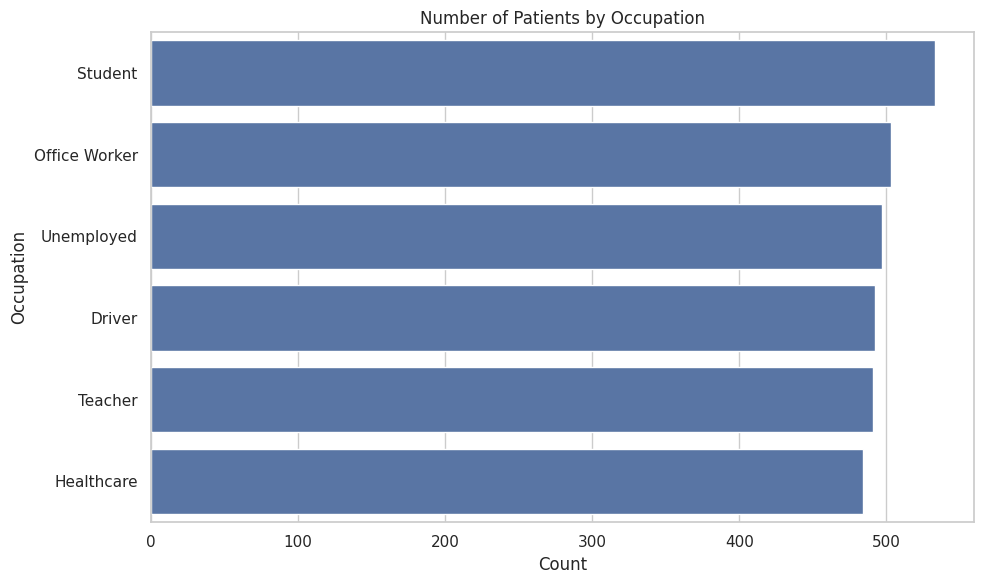

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index)
plt.title("Number of Patients by Occupation")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

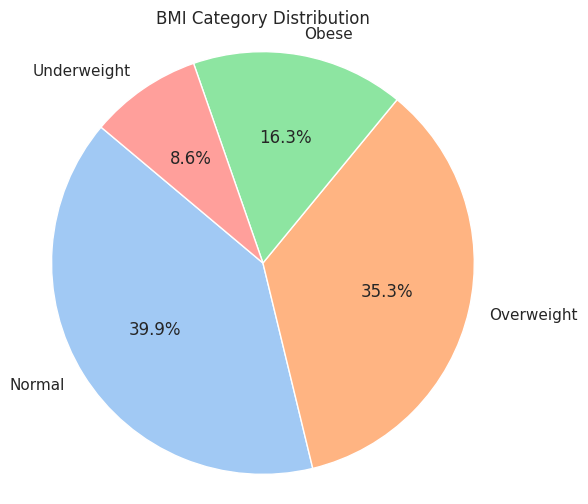

In [17]:
bmi_counts = df['BMI_Category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("BMI Category Distribution")
plt.axis('equal')
plt.show()

In [18]:
bins = [0, 18, 35, 50, 65, 80, 120]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

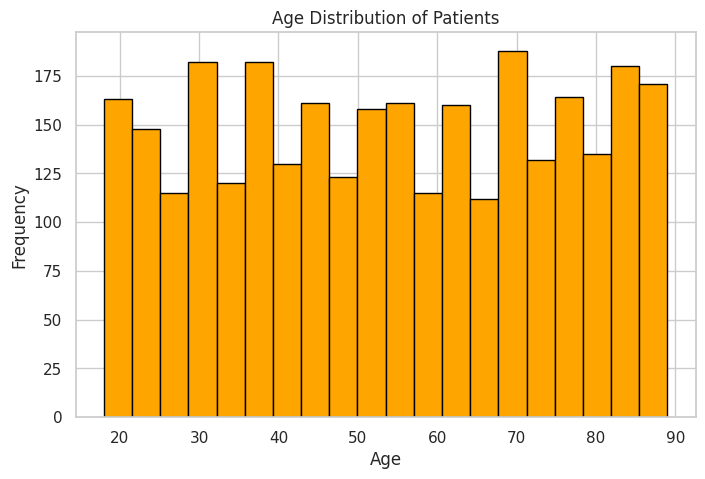

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

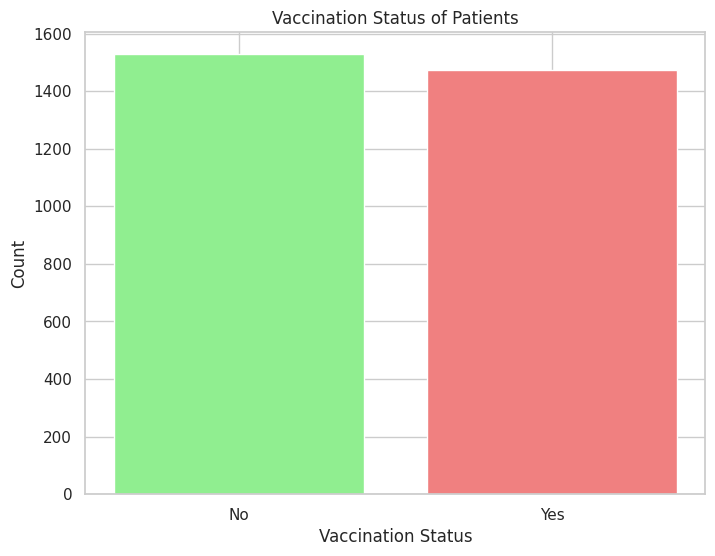

In [20]:
vax_counts = df['Vaccination_Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(vax_counts.index, vax_counts.values, color=['lightgreen', 'lightcoral'])
plt.title("Vaccination Status of Patients")
plt.xlabel("Vaccination Status")
plt.ylabel("Count")
plt.show()

In [22]:
print("Unique values in 'Hospitalized':", df['Hospitalized'].unique())
print("Unique values in 'Region':", df['Region'].unique())

Unique values in 'Hospitalized': ['Yes' 'No']
Unique values in 'Region': ['Hovedstaden' 'Sjælland' 'Syddanmark' 'Nordjylland' 'Midtjylland']


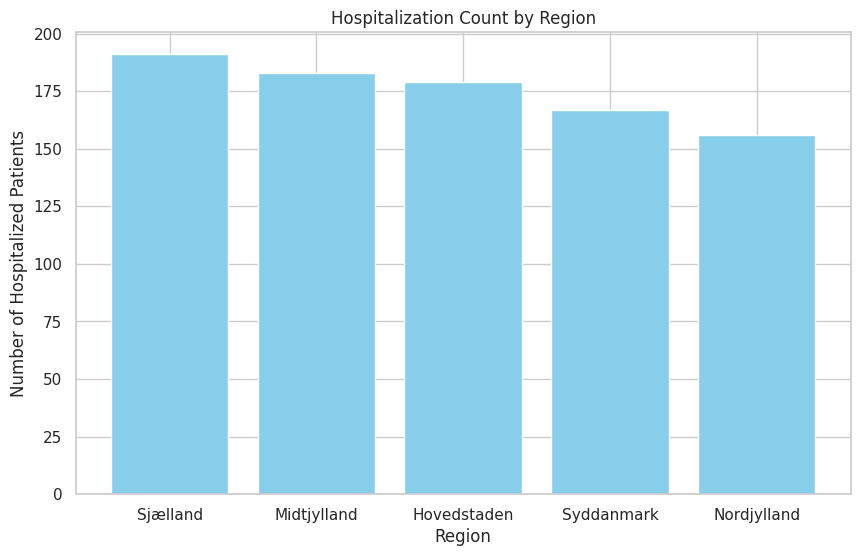

In [23]:
hospitalized_counts = df[df['Hospitalized'] == 'Yes']['Region'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(hospitalized_counts.index, hospitalized_counts.values, color='skyblue')
plt.title("Hospitalization Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Hospitalized Patients")
plt.show()

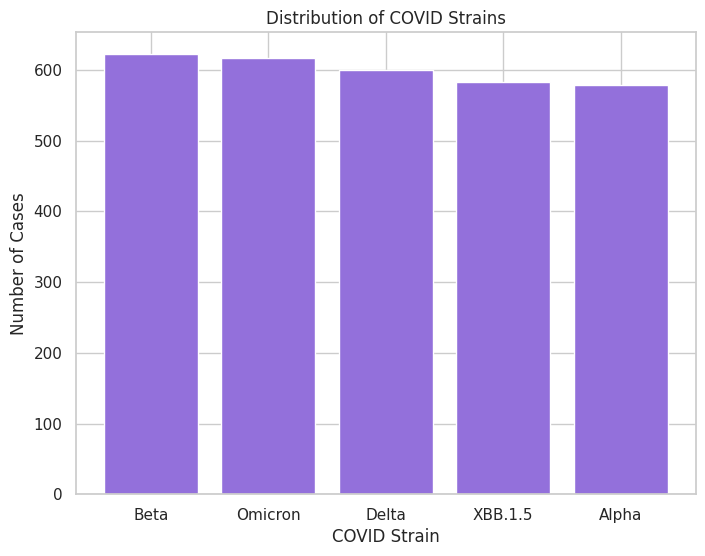

In [24]:
strain_counts = df['COVID_Strain'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(strain_counts.index, strain_counts.values, color='mediumpurple')
plt.title("Distribution of COVID Strains")
plt.xlabel("COVID Strain")
plt.ylabel("Number of Cases")
plt.show()